In [1]:
import torch
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import numpy as np
import os
from anode.conv_models import ConvODENet
from anode.discrete_models import ResNet
from anode.training import Trainer
from experiments.dataloaders import cifar10
from viz.plots import histories_plt

classes = ('plane','car', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck')

data_loader, test_loader = cifar10(256)


Files already downloaded and verified


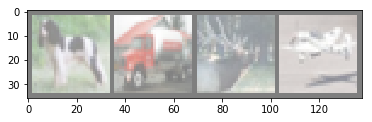

dog truck deer plane


In [21]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as transforms



# functions to show an image
img_size = (3, 32, 32)
output_dim = 10

def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(data_loader)
images, labels = dataiter.next()

dataiter_test = iter(data_loader)
images_test, labels_test = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images[0:4, :,:]))
# print labels
print(' '.join ('%s' % classes[labels[j]] for j in range(4)) )

In [6]:
from hamiltonianNN.conv_models import ConvHamilNet,ResNet
from hamiltonianNN.training import Trainer

model = ConvHamilNet(device, img_size, num_filters=64,hidden_dim=128, output_dim=10,
                                   augment_dim=0,
                                   non_linearity="relu",discret=True,num_layers=100,final_time=5,pool_size=2)

model.to(device)

optimizer = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=0.0001)

trainer = Trainer(model, optimizer, device,
          classification=True,
          print_freq=10,
          record_freq=10,
          verbose=True,
         )
trainer.train(data_loader, test_input=images[0:64, :,:],test_target=labels[0:64],num_epochs=50)


Iteration 0/196
Loss: 2.295

Iteration 10/196
Loss: 2.165

Iteration 20/196
Loss: 1.953

Iteration 30/196
Loss: 1.874

Iteration 40/196
Loss: 1.707

Iteration 50/196
Loss: 1.667

Iteration 60/196
Loss: 1.577

Iteration 70/196
Loss: 1.586

Iteration 80/196
Loss: 1.540

Iteration 90/196
Loss: 1.431

Iteration 100/196
Loss: 1.589

Iteration 110/196
Loss: 1.325

Iteration 120/196
Loss: 1.355

Iteration 130/196
Loss: 1.326

Iteration 140/196
Loss: 1.328

Iteration 150/196
Loss: 1.345

Iteration 160/196
Loss: 1.376

Iteration 170/196
Loss: 1.401

Iteration 180/196
Loss: 1.296

Iteration 190/196
Loss: 1.274
Epoch 1: 1.554

Iteration 0/196
Loss: 1.364

Iteration 10/196
Loss: 1.135

Iteration 20/196
Loss: 1.102

Iteration 30/196
Loss: 1.243

Iteration 40/196
Loss: 1.215

Iteration 50/196
Loss: 1.228

Iteration 60/196
Loss: 1.249

Iteration 70/196
Loss: 1.219

Iteration 80/196
Loss: 1.095

Iteration 90/196
Loss: 1.182

Iteration 100/196
Loss: 1.218

Iteration 110/196
Loss: 1.110

Iteration 120/


Iteration 30/196
Loss: 0.572

Iteration 40/196
Loss: 0.535

Iteration 50/196
Loss: 0.599

Iteration 60/196
Loss: 0.506

Iteration 70/196
Loss: 0.707

Iteration 80/196
Loss: 0.506

Iteration 90/196
Loss: 0.605

Iteration 100/196
Loss: 0.525

Iteration 110/196
Loss: 0.480

Iteration 120/196
Loss: 0.482

Iteration 130/196
Loss: 0.501

Iteration 140/196
Loss: 0.512

Iteration 150/196
Loss: 0.500

Iteration 160/196
Loss: 0.588

Iteration 170/196
Loss: 0.454

Iteration 180/196
Loss: 0.461

Iteration 190/196
Loss: 0.652
Epoch 14: 0.548

Iteration 0/196
Loss: 0.635

Iteration 10/196
Loss: 0.598

Iteration 20/196
Loss: 0.579

Iteration 30/196
Loss: 0.661

Iteration 40/196
Loss: 0.571

Iteration 50/196
Loss: 0.605

Iteration 60/196
Loss: 0.620

Iteration 70/196
Loss: 0.612

Iteration 80/196
Loss: 0.556

Iteration 90/196
Loss: 0.510

Iteration 100/196
Loss: 0.506

Iteration 110/196
Loss: 0.563

Iteration 120/196
Loss: 0.460

Iteration 130/196
Loss: 0.606

Iteration 140/196
Loss: 0.508

Iteration


Iteration 60/196
Loss: 0.306

Iteration 70/196
Loss: 0.221

Iteration 80/196
Loss: 0.301

Iteration 90/196
Loss: 0.257

Iteration 100/196
Loss: 0.274

Iteration 110/196
Loss: 0.325

Iteration 120/196
Loss: 0.361

Iteration 130/196
Loss: 0.395

Iteration 140/196
Loss: 0.333

Iteration 150/196
Loss: 0.399

Iteration 160/196
Loss: 0.345

Iteration 170/196
Loss: 0.293

Iteration 180/196
Loss: 0.377

Iteration 190/196
Loss: 0.286
Epoch 27: 0.314

Iteration 0/196
Loss: 0.307

Iteration 10/196
Loss: 0.353

Iteration 20/196
Loss: 0.277

Iteration 30/196
Loss: 0.218

Iteration 40/196
Loss: 0.288

Iteration 50/196
Loss: 0.245

Iteration 60/196
Loss: 0.241

Iteration 70/196
Loss: 0.233

Iteration 80/196
Loss: 0.312

Iteration 90/196
Loss: 0.384

Iteration 100/196
Loss: 0.229

Iteration 110/196
Loss: 0.287

Iteration 120/196
Loss: 0.309

Iteration 130/196
Loss: 0.268

Iteration 140/196
Loss: 0.329

Iteration 150/196
Loss: 0.283

Iteration 160/196
Loss: 0.325

Iteration 170/196
Loss: 0.293

Iterat


Iteration 90/196
Loss: 0.220

Iteration 100/196
Loss: 0.178

Iteration 110/196
Loss: 0.119

Iteration 120/196
Loss: 0.171

Iteration 130/196
Loss: 0.146

Iteration 140/196
Loss: 0.198

Iteration 150/196
Loss: 0.161

Iteration 160/196
Loss: 0.278

Iteration 170/196
Loss: 0.104

Iteration 180/196
Loss: 0.118

Iteration 190/196
Loss: 0.194
Epoch 40: 0.163

Iteration 0/196
Loss: 0.141

Iteration 10/196
Loss: 0.157

Iteration 20/196
Loss: 0.118

Iteration 30/196
Loss: 0.145

Iteration 40/196
Loss: 0.141

Iteration 50/196
Loss: 0.124

Iteration 60/196
Loss: 0.126

Iteration 70/196
Loss: 0.145

Iteration 80/196
Loss: 0.088

Iteration 90/196
Loss: 0.135

Iteration 100/196
Loss: 0.093

Iteration 110/196
Loss: 0.134

Iteration 120/196
Loss: 0.120

Iteration 130/196
Loss: 0.128

Iteration 140/196
Loss: 0.130

Iteration 150/196
Loss: 0.125

Iteration 160/196
Loss: 0.122

Iteration 170/196
Loss: 0.130

Iteration 180/196
Loss: 0.187

Iteration 190/196
Loss: 0.156
Epoch 41: 0.141

Iteration 0/196
Lo

### test accuracy

In [8]:
from hamiltonianNN.conv_models import accuracy
accuracy(test_loader,model)

Accuracy of the network on the 10000 test images: 75.530000 %


### train accuracy

In [9]:
accuracy(data_loader,model)

Accuracy of the network on the 10000 test images: 98.240000 %


In [ ]:

model = ConvHamilNet(device, img_size, num_filters=64,hidden_dim=256, output_dim=10,
                                   non_linearity="relu",discret=True,num_layers=100,final_time=10,pool_size=2)

model.to(device)

optimizer = torch.optim.Adam(model.parameters(),lr=1e-3,weight_decay=0.01)

trainer = Trainer(model, optimizer, device,
          classification=True,
          print_freq=50,
          record_freq=10,
          verbose=True,
         )
trainer.train(data_loader, test_input=images_test[0:1, :,:],test_target=labels_test[0:1],num_epochs=50)


Iteration 0/196
Loss: 2.297

Iteration 50/196
Loss: 1.850

Iteration 100/196
Loss: 1.607

Iteration 150/196
Loss: 1.501
Epoch 1: 1.729

Iteration 0/196
Loss: 1.485

Iteration 50/196
Loss: 1.421

Iteration 100/196
Loss: 1.430

Iteration 150/196
Loss: 1.395
Epoch 2: 1.415

Iteration 0/196
Loss: 1.211

Iteration 50/196
Loss: 1.339

Iteration 100/196
Loss: 1.231

Iteration 150/196
Loss: 1.239
Epoch 3: 1.295

Iteration 0/196
Loss: 1.229

Iteration 50/196
Loss: 1.165

Iteration 100/196
Loss: 1.259

Iteration 150/196
Loss: 1.183
Epoch 4: 1.228

Iteration 0/196
Loss: 1.210

Iteration 50/196
Loss: 1.167

Iteration 100/196
Loss: 1.112

Iteration 150/196
Loss: 1.252
Epoch 5: 1.171

Iteration 0/196
Loss: 1.162

Iteration 50/196
Loss: 1.093

Iteration 100/196
Loss: 1.047

Iteration 150/196
Loss: 1.256
Epoch 6: 1.114

Iteration 0/196
Loss: 0.969

Iteration 50/196
Loss: 1.014

Iteration 100/196
Loss: 1.075

Iteration 150/196
Loss: 1.241
Epoch 7: 1.077

Iteration 0/196
Loss: 1.130

Iteration 50/196
L

In [15]:
from hamiltonianNN.conv_models import accuracy
accuracy(test_loader,model) 

Accuracy of the network on the 10000 test images: 67.190000 %


In [22]:
accuracy(data_loader,model)

Accuracy of the network on the 10000 test images: 69.624000 %


In [ ]:
from hamiltonianNN.conv_models import accuracy
accuracy(test_loader,model)

In [ ]:
accuracy(data_loader,model)

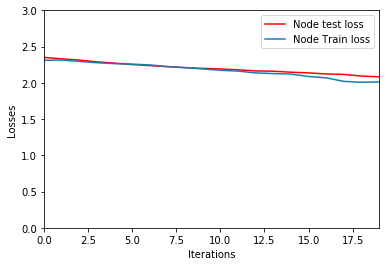

In [34]:
plt.plot(trainer.histories['test_loss_history'],color='red',label='test loss')
plt.plot(trainer.histories['loss_history'],label='Train loss')
plt.xlim(0, len(trainer.histories['test_loss_history']) - 1)
plt.ylim(0,3)
plt.xlabel('Iterations')
plt.ylabel('Losses')
plt.legend()